In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

In [2]:
db=pd.read_csv("./data.csv")

In [3]:
genmap={'Male':0,'Female':1}
ynmap={'yes':1,'no':0}
freq_map={'Always':0,'Frequently':1,'Sometimes':2,'no':3}
trans_map={'Public_Transportation':0,'Walking':1,'Automobile':2,'Motorbike':3,'Bike':4}
ob_map={'Obesity_Type_I':0,'Obesity_Type_III':0,'Obesity_Type_II':0,'Overweight_Level_I':0,'Overweight_Level_II':0,'Normal_Weight':1,'Insufficient_Weight':1}

In [4]:
db.FAVC=db.FAVC.replace(ynmap)
db.family_history_with_overweight=db.family_history_with_overweight.replace(ynmap)
db.SCC=db.SCC.replace(ynmap)
db.SMOKE=db.SMOKE.replace(ynmap)
db.CALC=db.CALC.replace(freq_map)
db.CAEC=db.CAEC.replace(freq_map)
db.MTRANS=db.MTRANS.replace(trans_map)
db.NObeyesdad=db.NObeyesdad.replace(ob_map)
db.Gender=db.Gender.replace(genmap)

In [5]:
db.astype(float)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,0.0,1.0
1,1.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,0.0,1.0
2,0.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,0.0,1.0
3,0.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,1.0,0.0
4,0.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,0.0,0.0
2107,1.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,0.0,0.0
2108,1.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,0.0,0.0
2109,1.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,0.0,0.0


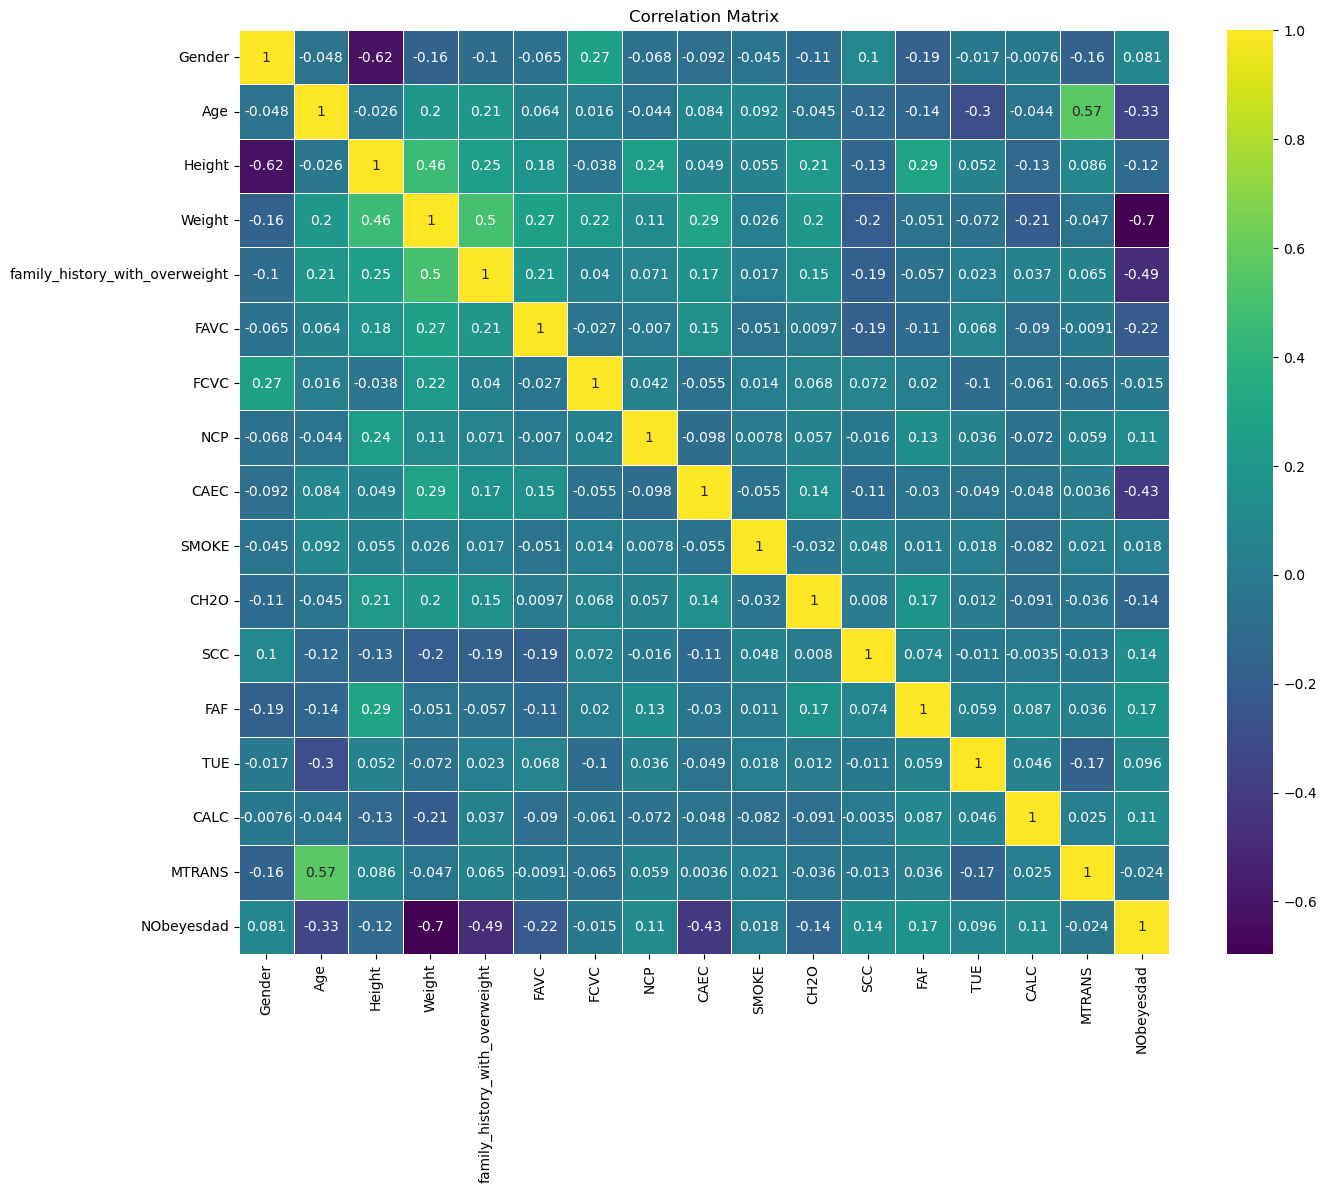

In [6]:
#Correlation matrix to figure out which features to drop
c_mat=db.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(c_mat, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
db=db.drop(['Gender', 'FCVC', 'SMOKE', 'TUE', 'MTRANS'],axis=1)
db.rename(columns={'NObeyesdad': 'target'}, inplace=True)


In [8]:
#Creating independent and dependent vectors
X=db.drop("target", axis=1)
y=db.target
X=X.to_numpy()
y=y.to_numpy()

In [9]:
#Mean Normalisation and Feature Scaling
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X-X_mean) #Mean Normalisation
X=X/X_std #Feature Scaling

In [10]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

In [11]:
def log(x):
    for k in x:
        _=math.log(k)
    return x

In [12]:
def binar(x):
    thresh = 0.5
    result = np.where(x < thresh, 0, 1)
    return result

In [13]:
#Defining the hypothesis
def predict(features,weights,bias):
    e=2.71828
    perc=np.dot(features,weights)+bias
    predictions=1/(1+e**(-(perc)))
    return predictions

In [14]:
#Defining the gradient descent and returning cost history for Epoch graph
def grad(X,y,W,b,n,lr,thresh):
    prev_cost = float('inf')
    cost_hist=[]
    
    while True:
        preds=predict(X,W,b)
        err = preds - y

        dW = 1/n* np.dot(X.T, err)
        db = 1/n*np.sum(err)

        W-=lr*dW
        b-=lr*db
        cost=-np.mean(y*(log(preds))+(1-y)*(log(1-preds)))
        cost_hist.append(cost)
        if (abs(prev_cost - cost)<thresh):
            break
        prev_cost = cost
    return W,b,cost_hist

In [15]:
#Defining R-square calculating method
def score(y_true, y_pred):
    m = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / m
    return accuracy

In [22]:
#Setting the init values and plotting Cost vs Epoch and 1 example feature (bore-ratio) vs predicted value graph
lr=0.1
thresh=0.001
mark = 0.5
n,col = X_train.shape
W = np.zeros(col)
b= 0

W,b,cost_hist=grad(X_train,y_train,W,b,n,lr,thresh)
res=predict(X_test,W,b)
res=binar(res)
print(f"R2 score:{score(y_test,res)}")


R2 score:0.9078014184397163
